In [1]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

import math

import matplotlib.pyplot as plt

from scipy.spatial import distance

mbyte = 1048576
norm_l1 = Normalizer(norm='l1')
norm_l2 = Normalizer(norm='l2')

In [2]:
from scipy.io import loadmat

# Set your dataset path(First)

In [19]:
path = '' # /home/username/datasets/

# Tools

In [4]:
from hashlib import md5

def find_nearest_neighbor(P, q):
    dis = np.array([distance.euclidean(p, q) for p in P])
    return np.argsort(dis)[0]

def fvecs_read(filename, c_contiguous=True):
    fv = np.fromfile(filename, dtype=np.float32)
    if fv.size == 0:
        return np.zeros((0, 0))
    dim = fv.view(np.int32)[0]
    assert dim > 0
    fv = fv.reshape(-1, 1 + dim)
    if not all(fv.view(np.int32)[:, 0] == dim):
        raise IOError("Non-uniform vector sizes in " + filename)
    fv = fv[:, 1:]
    if c_contiguous:
        fv = fv.copy()
    return fv


def store_dataset(title, train, test, K, distance_function, app='ann'):
    data = dict()
    data['title'] = title
    data['train'] = train
    data['test'] = test
    data['n_train'] = train.shape[0]
    data['n_test'] = test.shape[0]
    
    if app == 'ann': # approximate nearest neighbor search
        data['K'] = K
        
        k_near_neighbors = []
        nearest_neighbor = []

        for i, q in enumerate(test):
            d = np.array([distance_function(q, p) for p in train])
            order_d = d.argsort()

            k_near_neighbors.append(order_d[:K])
            nearest_neighbor.append(order_d[0])

        data['k_near_neighbors'] = k_near_neighbors
        data['nearest_neighbor'] = nearest_neighbor
    
    return data

# Datasets Arguments

In [5]:
Datasets = dict()

# params

In [6]:
app = 'kde'

# SIFT
[website](http://corpus-texmex.irisa.fr/)

## 10K
[download](ftp://ftp.irisa.fr/local/texmex/corpus/siftsmall.tar.gz)

Linux 
```
wget ftp://ftp.irisa.fr/local/texmex/corpus/siftsmall.tar.gz
```

In [7]:
train = fvecs_read(path + 'sift/sifts-10K/sift_base.fvecs').astype(np.int)
test = fvecs_read(path + 'sift/sifts-10K/sift_query.fvecs').astype(np.int)

In [8]:
%%time
sift = store_dataset(title='SIFT-10K', train=train, test=test, K=50, 
                     distance_function=distance.euclidean, app=app)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.2 µs


In [9]:
Datasets['SIFT-10K'] = sift

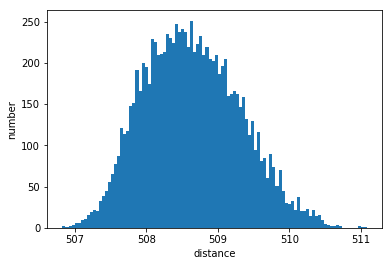

In [10]:
norm_distance = np.sqrt(np.sum(train.astype(np.int64) ** 2, axis=1))
plt.hist(norm_distance, bins=100)
plt.ylabel('number')
plt.xlabel('distance')
plt.show()

## data structure

In [ ]:
q = test[0]

In [ ]:
%%time
d2 = np.array([distance.cosine(q, p) for p in train])
d2 = np.arccos(np.array([distance.cosine(q, p) for p in train]))
plt.hist(d2, bins=100, color='r', alpha=0.5, density=True)

In [ ]:
%%time
d2 = np.array([distance.euclidean(q, p) for p in train])
plt.hist(d2, bins=100, color='r', alpha=0.5, density=True)

# MNIST

In [ ]:
mnist = datasets.fetch_mldata('mnist-original')['data']

In [ ]:
norm_distance = np.sqrt(np.sum(mnist.astype(np.int64) ** 2, axis=1))
plt.hist(norm_distance, bins=100)
plt.ylabel('number')
plt.xlabel('distance')
plt.show()

In [ ]:
train, test = train_test_split(mnist, test_size=1000, random_state=1)
train.shape, test.shape

In [ ]:
q = test[0]
dis = np.array([distance.euclidean(q, p) for p in train])
plt.hist(dis, bins=100)
plt.show()

In [ ]:
train.shape[0] * 0.005

In [ ]:
np.percentile(dis, 0.5)

In [ ]:
data_mnist = store_dataset(title='MNIST', train=train, test=test, K=100, 
                                   distance_function=distance.euclidean)

In [ ]:
Datasets['MNIST'] = data_mnist

## Hamming

In [ ]:
mnist_hamming = mnist.copy()

In [ ]:
mnist_hamming[mnist_hamming > 0] = 1

In [ ]:
train, test = train_test_split(mnist_hamming, test_size=500, random_state=1)
train.shape, test.shape

In [ ]:
q = test[0]
d2 = np.array([distance.hamming(q, p) for p in train])
plt.hist(d2, bins=100, color='r', alpha=0.5, density=True)

In [ ]:
plt.hist(np.sum(train, axis=1), bins=100, color='r', alpha=0.5, density=True)

In [ ]:
data_mnist_hamming = store_dataset(title='MNIST-Hamming', train=train, test=test, K=100, 
                                   distance_function=distance.hamming)

In [ ]:
Datasets['MNIST-Hamming'] = data_mnist_hamming

# GIST512

[download](https://www.dropbox.com/s/875u1rkva9iffpj/Gist512CIFAR10.mat?dl=0&m=)

In [11]:
gist512 = loadmat(path + 'Gist512CIFAR10.mat')['X']

In [12]:
gist512.shape

(60000, 512)

In [13]:
train, test = train_test_split(gist512, test_size=600, random_state=1)

In [14]:
%%time
gist = store_dataset(title='GIST-512', train=train, test=test, K=100, 
                     distance_function=distance.euclidean, app=app)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 10.5 µs


In [15]:
Datasets['GIST-512'] = gist

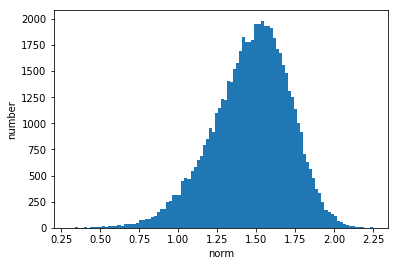

In [16]:
norm_distance = np.sqrt(np.sum(train ** 2, axis=1))
plt.hist(norm_distance, bins=100)
plt.ylabel('number')
plt.xlabel('norm')
plt.show()

# Store Dataset

In [17]:
# 最近邻数据
%store Datasets

Stored 'Datasets' (dict)


**Read data in other notebook.**

In [18]:
# %store -r Datasets